# Milestone 2：

In [1]:
import os

import matplotlib.pyplot as plt
import music21
from music21 import *
import numpy as np
import pandas as pd

D:\miniconda\envs\ada\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [2]:
### Config 
DATA_DIR = r'./another_midi'                    # path to dataset
SAMPLE_FILE = r'./another_midi/ps02/ps02_04.mid'  # path to an entity

In [3]:
### Object structure used by music21 lib
materials = []
midi = converter.parse(SAMPLE_FILE)
parts = instrument.partitionByInstrument(midi)
for music_instrument in parts:
    for element_by_offset in stream.iterator.OffsetIterator(music_instrument):
        for entry in element_by_offset:
            materials.append(type(entry))
set(materials)

{music21.chord.Chord,
 music21.instrument.Piano,
 music21.key.Key,
 music21.meter.TimeSignature,
 music21.note.Note,
 music21.note.Rest,
 music21.tempo.MetronomeMark}

In [4]:
def preprocess_pitch(file_path):
    '''
    Decode midi file and convert pitches to frequencies.
    ONLY save pitches for now.
    '''
    note_list = []
    midi = converter.parse(file_path)
    parts = instrument.partitionByInstrument(midi)
    for music_instrument in parts:
        for element_by_offset in stream.iterator.OffsetIterator(music_instrument):
            for entry in element_by_offset:
                if isinstance(entry, note.Note):
                    note_list.append(str(entry.pitch))
    # df['frequency'] = df['pitch'].apply(lambda x: pitch.Pitch(x).freq440)
    return note_list

In [5]:
### Parse dataset and construct the dataframe
df = pd.DataFrame()
for folder in os.listdir(DATA_DIR):
    for midi_file in os.listdir(f'{DATA_DIR}/{folder}'):
        if midi_file.endswith('.mid'):
            file_path = f'{DATA_DIR}/{folder}/{midi_file}'
            movement = pd.DataFrame(preprocess_pitch(file_path), columns=[midi_file])
            df = pd.concat([df, movement], axis=1) 
    print(f'>>> Finish sonata {folder}')

>>> Finish sonata ps01
>>> Finish sonata ps02
>>> Finish sonata ps03
>>> Finish sonata ps04
>>> Finish sonata ps05
>>> Finish sonata ps06
>>> Finish sonata ps07
>>> Finish sonata ps08
>>> Finish sonata ps09
>>> Finish sonata ps10
>>> Finish sonata ps11
>>> Finish sonata ps12
>>> Finish sonata ps13
>>> Finish sonata ps14
>>> Finish sonata ps15
>>> Finish sonata ps16
>>> Finish sonata ps17
>>> Finish sonata ps18
>>> Finish sonata ps19
>>> Finish sonata ps20
>>> Finish sonata ps21
>>> Finish sonata ps22
>>> Finish sonata ps23
>>> Finish sonata ps24
>>> Finish sonata ps25
>>> Finish sonata ps26
>>> Finish sonata ps27
>>> Finish sonata ps28
>>> Finish sonata ps29
>>> Finish sonata ps30
>>> Finish sonata ps31
>>> Finish sonata ps32


In [6]:
df.head()

,ps01_01.mid,ps01_02.mid,ps01_03.mid,ps01_04.mid,ps02_01.mid,ps02_02.mid,ps02_03.mid,ps02_04.mid,ps03_01.mid,ps03_02.mid,...,ps29_03.mid,ps29_04.mid,ps30_01.mid,ps30_02.mid,ps30_03.mid,ps31_01.mid,ps31_02.mid,ps31_03.mid,ps32_01.mid,ps32_02.mid
0,C4,C4,F3,F3,A3,D3,A5,A2,G3,B3,...,A3,F2,G#4,G4,E2,E-3,E5,E-5,A4,C5
1,F4,C4,C4,G#3,E3,D2,E5,C#3,C3,G#4,...,C#4,F3,B4,E4,E4,C3,G5,G#5,B4,E4
2,G#4,A4,B-4,C4,E4,E2,C#6,E3,F4,F#4,...,A4,F4,E3,B4,B3,G#3,G#5,F#5,C5,G4
3,C5,F3,G#4,F3,E3,D3,A5,A3,B4,G#4,...,D4,F3,B3,B4,G#2,C4,G#5,E-4,D5,G4
4,F5,C4,C#5,G#3,D4,F#2,E6,C#4,D3,A4,...,E-4,F4,B4,G4,C#4,E-5,F5,B3,E5,E4


In [7]:
### Save intermediate data for fast resuming
# df.to_csv('./sonata_pitches.csv')

In [8]:
df_freq = pd.DataFrame()
for i in df.columns:
    df_freq[i[:-4]] = df[i].apply(lambda x: pitch.Pitch(x).freq440 if x is not np.nan else np.nan)
df_freq.head()

,ps01_01,ps01_02,ps01_03,ps01_04,ps02_01,ps02_02,ps02_03,ps02_04,ps03_01,ps03_02,...,ps29_03,ps29_04,ps30_01,ps30_02,ps30_03,ps31_01,ps31_02,ps31_03,ps32_01,ps32_02
0,261.625565,261.625565,174.614116,174.614116,220.000000,146.832384,880.000000,110.000000,195.997718,246.941651,...,220.000000,87.307058,415.304698,391.995436,82.406889,155.563492,659.255114,622.253967,440.000000,523.251131
1,349.228231,261.625565,261.625565,207.652349,164.813778,73.416192,659.255114,138.591315,130.812783,415.304698,...,277.182631,174.614116,493.883301,329.627557,329.627557,130.812783,783.990872,830.609395,493.883301,329.627557
2,415.304698,440.000000,466.163762,261.625565,329.627557,82.406889,1108.730524,164.813778,349.228231,369.994423,...,440.000000,349.228231,164.813778,493.883301,246.941651,207.652349,830.609395,739.988845,523.251131,391.995436
3,523.251131,174.614116,415.304698,174.614116,164.813778,146.832384,880.000000,220.000000,493.883301,415.304698,...,293.664768,174.614116,246.941651,493.883301,103.826174,261.625565,830.609395,311.126984,587.329536,391.995436
4,698.456463,261.625565,554.365262,207.652349,293.664768,92.498606,1318.510228,277.182631,146.832384,440.000000,...,311.126984,349.228231,493.883301,391.995436,277.182631,622.253967,698.456463,246.941651,659.255114,329.627557


Text(0.5, 0, 'Movement')

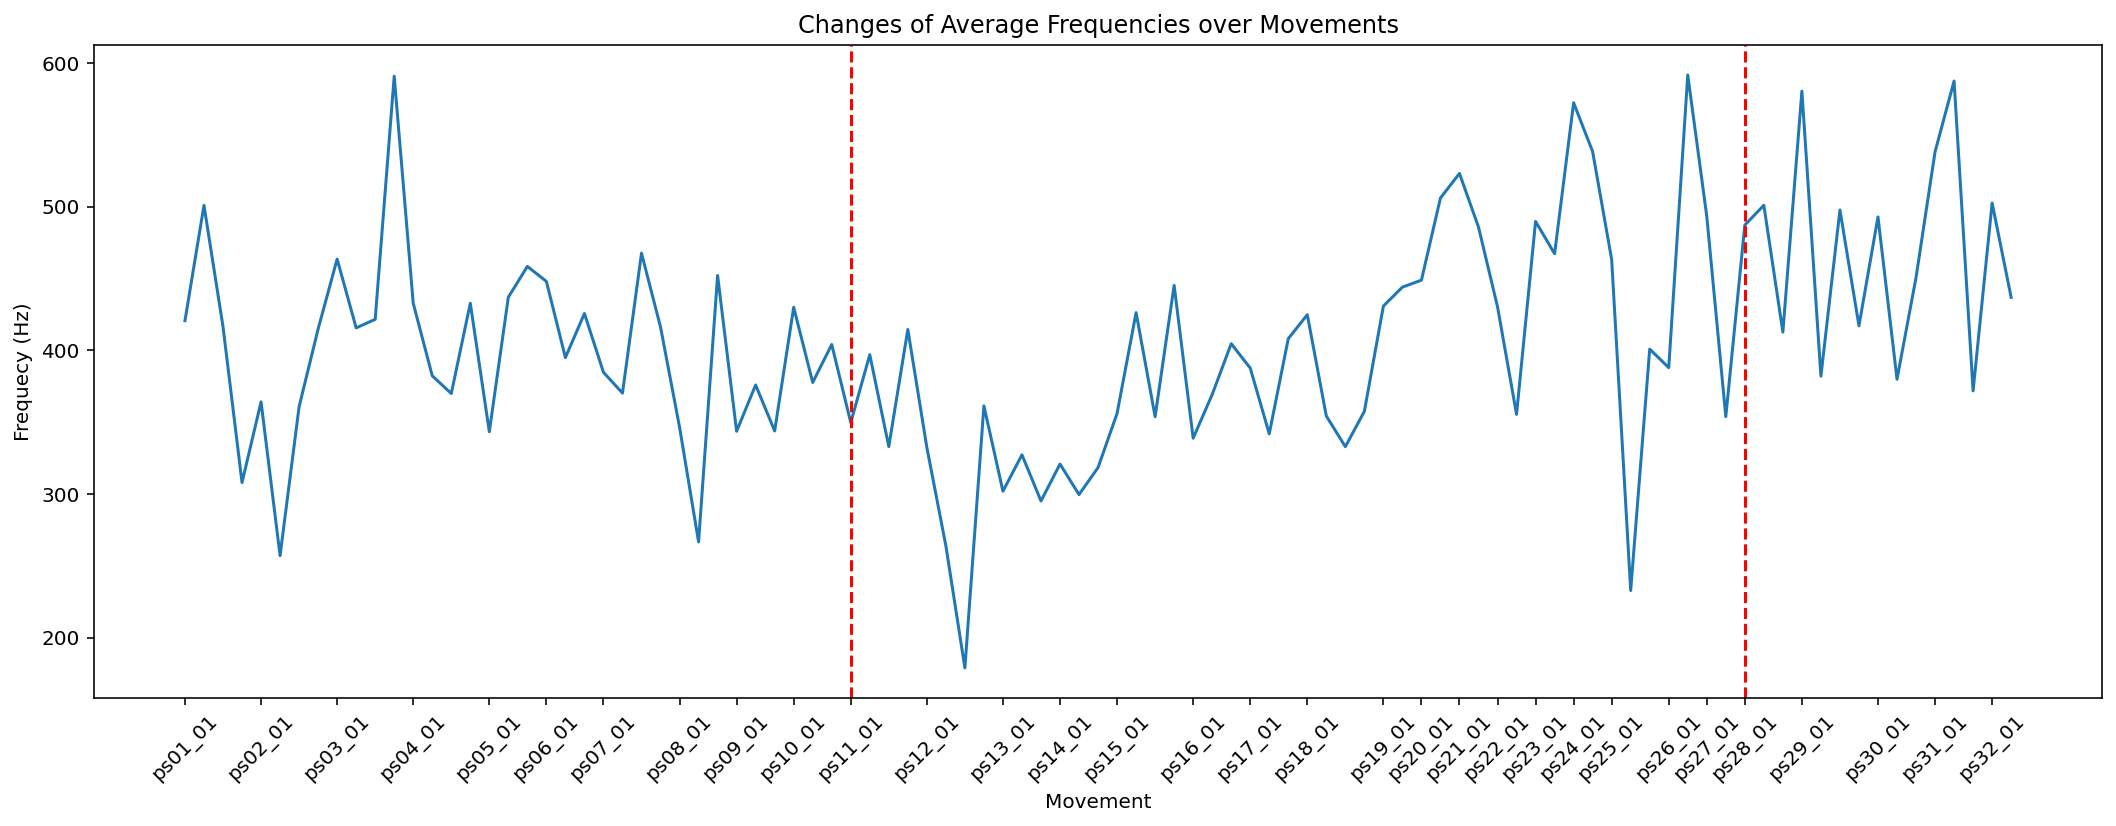

In [9]:
movement_mean = df_freq.mean(axis=0)

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
ax.plot(movement_mean)
xticks = [f'ps{i:02}_01' for i in range(1, 33)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels=xticks, rotation=45)
ax.axvline('ps11_01', color='red', ls='--')
ax.axvline('ps28_01', color='red', ls='--')
ax.set_title('Changes of Average Frequencies over Movements')
ax.set_ylabel('Frequecy (Hz)')
ax.set_xlabel('Movement')

In [10]:
df_sonata = pd.DataFrame()
# [f'ps{i:02}_01' for i in range(1, 33)]
for i in range(1, 33):
    cur_sonata = df_freq[f'ps{i:02}_01'].dropna()
    for j in range(2, 10):
        if f'ps{i:02}_{j:02}' in df_freq:
            cur_movement = df_freq[f'ps{i:02}_{j:02}'].dropna()
            cur_sonata = cur_sonata.append(cur_movement).reset_index(drop=True)
        else:
            break
    sonata = pd.DataFrame(cur_sonata, columns=[f'ps{i:02}'])
    df_sonata = pd.concat([df_sonata, sonata], axis=1) 
df_sonata

,ps01,ps02,ps03,ps04,ps05,ps06,ps07,ps08,ps09,ps10,...,ps23,ps24,ps25,ps26,ps27,ps28,ps29,ps30,ps31,ps32
0,261.625565,220.000000,195.997718,77.781746,391.995436,523.251131,73.416192,155.563492,493.883301,293.664768,...,261.625565,493.883301,293.664768,311.126984,391.995436,415.304698,466.163762,415.304698,155.563492,440.000000
1,349.228231,164.813778,130.812783,155.563492,622.253967,493.883301,277.182631,146.832384,554.365262,587.329536,...,65.406391,554.365262,293.664768,415.304698,369.994423,329.627557,233.081881,493.883301,130.812783,493.883301
2,415.304698,329.627557,349.228231,155.563492,523.251131,587.329536,69.295658,130.812783,622.253967,466.163762,...,207.652349,493.883301,293.664768,391.995436,293.664768,164.813778,58.270470,164.813778,207.652349,523.251131
3,523.251131,164.813778,493.883301,155.563492,783.990872,523.251131,246.941651,184.997211,987.766603,493.883301,...,51.913087,466.163762,293.664768,391.995436,391.995436,82.406889,58.270470,246.941651,261.625565,587.329536
4,698.456463,293.664768,146.832384,155.563492,622.253967,466.163762,61.735413,195.997718,1108.730524,369.994423,...,174.614116,493.883301,293.664768,554.365262,493.883301,246.941651,466.163762,493.883301,622.253967,659.255114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1479.977691,NaN,NaN,NaN
14274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,164.813778,NaN,NaN,NaN
14275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,184.997211,NaN,NaN,NaN
14276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,195.997718,NaN,NaN,NaN


<ipython-input-11-20a69e2f6769>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_sonata.mean().index, rotation=45)


Text(0.5, 0, 'Sonata')

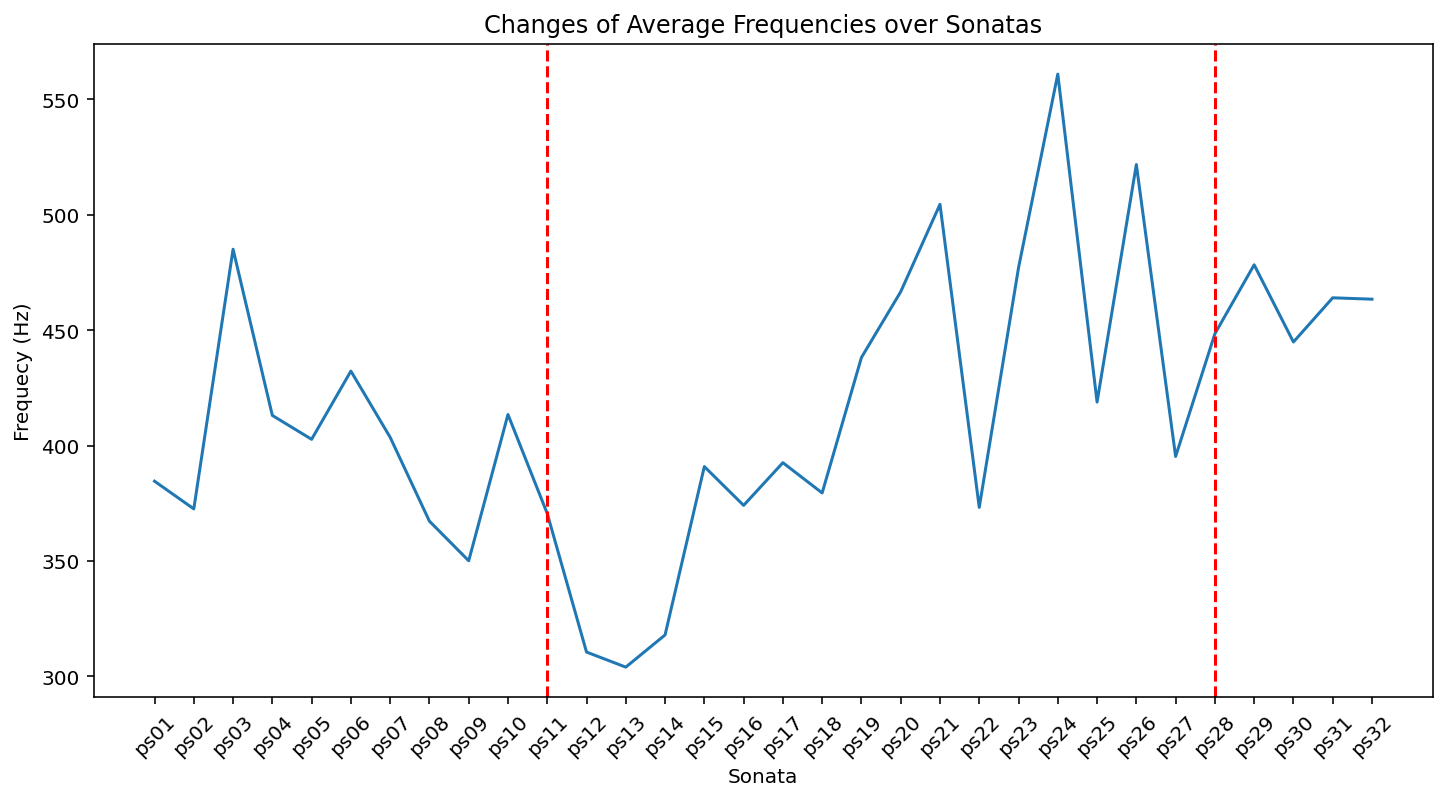

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(df_sonata.mean())
ax.set_xticklabels(labels=df_sonata.mean().index, rotation=45)
ax.axvline('ps11', color='red', ls='--')
ax.axvline('ps28', color='red', ls='--')
ax.set_title('Changes of Average Frequencies over Sonatas')
ax.set_ylabel('Frequecy (Hz)')
ax.set_xlabel('Sonata')

In [12]:
threshold = pitch.Pitch('C6').freq440
df_ratio = df_sonata.apply(lambda x: x >= threshold).sum() / df_sonata.notna().sum()

<ipython-input-13-7902267a3fe6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xticks)


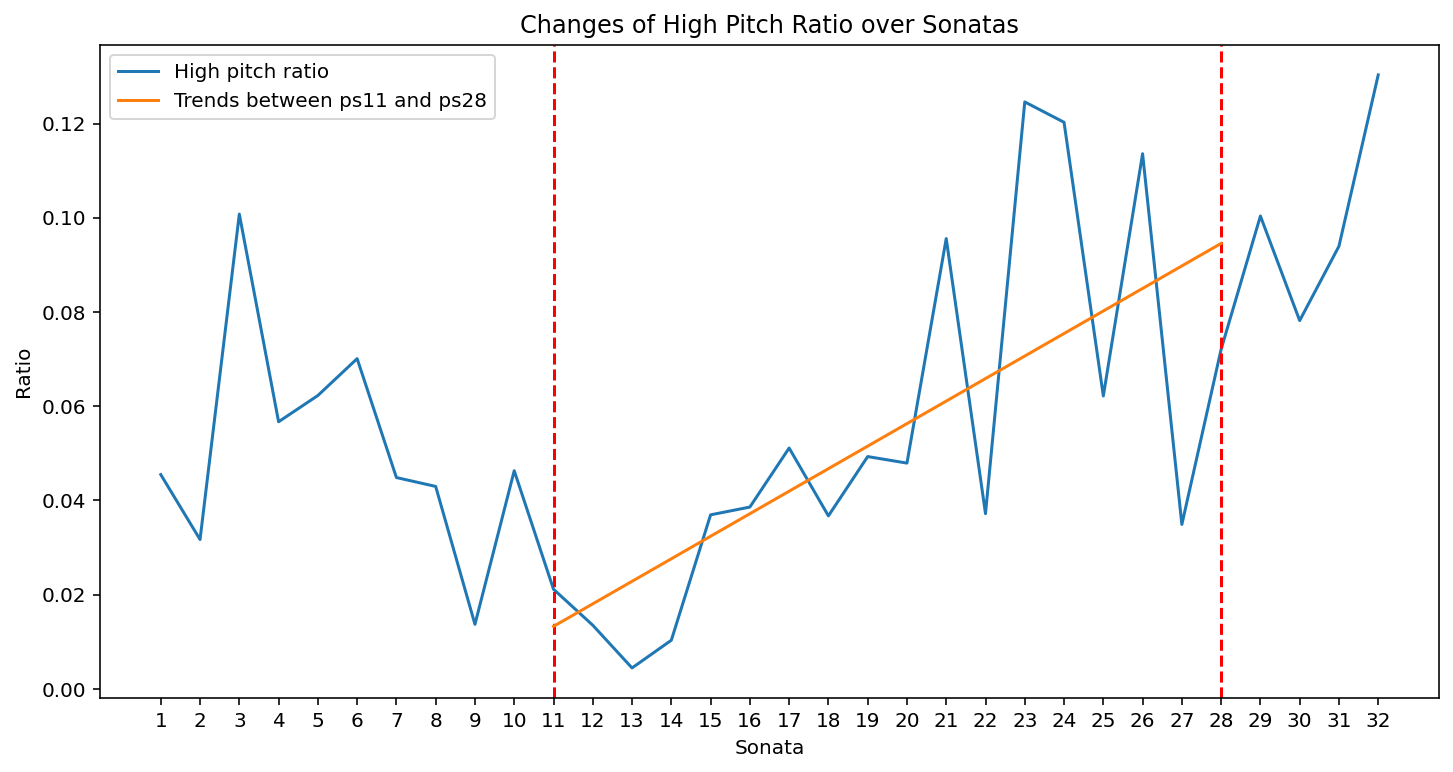

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(df_ratio, label='High pitch ratio')
xticks = range(1, 33)
ax.set_xticklabels(labels=xticks)
ax.axvline('ps11', color='red', ls='--')
ax.axvline('ps28', color='red', ls='--')
ax.set_title('Changes of High Pitch Ratio over Sonatas')
ax.set_ylabel('Ratio')
ax.set_xlabel('Sonata')

x = range(10, 28)
m, b = np.polyfit(x, df_ratio.iloc[x].values, 1)
ax.plot(x, m * x + b, ls='-', label='Trends between ps11 and ps28')
ax.legend()